<div class="alert alert-block alert-info">
<span style="color: rgb(0,53,91);">
<font face = "Times New Roman" size = "5"><b><center>Programación para Minería de Datos</center></b></font>
<b><br><font face = "Times New Roman" size = "5"><center> Proyecto</center></font>
<font face = "Times New Roman" size = "5"><center>Segunda entrega: Preparación de datos para su modelado</center></font>
<font face = "Times New Roman" size = "5"><center> Dataset: new york city airbnb </center></font>
</span></div>


**1. Cargar el dataset:**

En esta sección se realiza la carga del conjunto de datos **Airbnb NYC 2019**, el cual contiene información sobre los alojamientos disponibles en la ciudad de Nueva York durante el año 2019.


In [2]:
# Carga del dataset:

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

df = pd.read_csv("../datos/AB_NYC_2019.csv")
df.head()



,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,2539,Clean & quiet apt home by the park,2787,John,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,2018-10-19,0.21,6,365
1,2595,Skylit Midtown Castle,2845,Jennifer,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,2019-05-21,0.38,2,355
2,3647,THE VILLAGE OF HARLEM....NEW YORK !,4632,Elisabeth,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,NaN,NaN,1,365
3,3831,Cozy Entire Floor of Brownstone,4869,LisaRoxanne,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,2019-07-05,4.64,1,194
4,5022,Entire Apt: Spacious Studio/Loft by central park,7192,Laura,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,2018-11-19,0.10,1,0


**2. Información general del dataset:**

En esta sección se analizó la estructura del conjunto de datos para conocer sus características principales, tipos de datos y valores faltantes.

Se observa que el dataset contiene **48,895 registros y 16 columnas**.  
Entre las columnas se incluyen tanto variables **numéricas** (como `price`, `minimum_nights`, `number_of_reviews`, `availability_365`) como **categóricas** (`neighbourhood_group`, `room_type`, `neighbourhood`, `host_name`, etc.).

Al revisar los valores faltantes, se identificó que las columnas **`name`** y **`host_name`** presentan pocos datos nulos, mientras que las columnas **`last_review`** y **`reviews_per_month`** tienen alrededor de **10,052 valores faltantes**, lo cual es importante considerar en el análisis posterior.

En general, los datos están bien estructurados y listos para el análisis exploratorio, aunque será necesario tratar los valores nulos en las variables mencionadas.

In [6]:
#Conocer la estrucutra basica:

print("Info")
df.info()
print("describe")
df.describe()
print("nulls")
df.isnull().sum()


Info
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48895 entries, 0 to 48894
Data columns (total 16 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   id                              48895 non-null  int64  
 1   name                            48879 non-null  object 
 2   host_id                         48895 non-null  int64  
 3   host_name                       48874 non-null  object 
 4   neighbourhood_group             48895 non-null  object 
 5   neighbourhood                   48895 non-null  object 
 6   latitude                        48895 non-null  float64
 7   longitude                       48895 non-null  float64
 8   room_type                       48895 non-null  object 
 9   price                           48895 non-null  int64  
 10  minimum_nights                  48895 non-null  int64  
 11  number_of_reviews               48895 non-null  int64  
 12  last_review                

id                                    0
name                                 16
host_id                               0
host_name                            21
neighbourhood_group                   0
neighbourhood                         0
latitude                              0
longitude                             0
room_type                             0
price                                 0
minimum_nights                        0
number_of_reviews                     0
last_review                       10052
reviews_per_month                 10052
calculated_host_listings_count        0
availability_365                      0
dtype: int64

**3. Calidad de los datos – valores faltantes:**

En este análisis se identificaron las columnas que contienen valores nulos dentro del dataset.  
Se observa que las variables **`last_review`** y **`reviews_per_month`** presentan un porcentaje de valores faltantes cercano al **20%**, lo cual se debe a que no todos los alojamientos han recibido reseñas.  

Además, las columnas **`name`** y **`host_name`** presentan una cantidad mínima de datos nulos (menor al 0.1%), por lo que no representan un problema significativo para el análisis general.  

En conclusión, el dataset mantiene una buena calidad, aunque será necesario decidir cómo tratar los valores ausentes en las columnas relacionadas con reseñas.

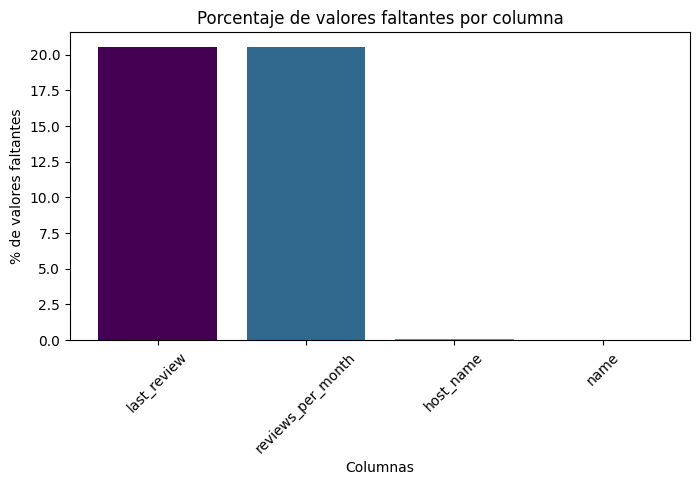

In [18]:
#Calidad de los datos — valores faltantes:
missing_percent = df.isnull().sum() * 100 / len(df)
missing_percent = missing_percent[missing_percent > 0].sort_values(ascending=False)

plt.figure(figsize=(8,4))
plt.bar(missing_percent.index, missing_percent.values, color=plt.cm.viridis(np.linspace(0, 1, len(missing_percent))))
plt.title("Porcentaje de valores faltantes por columna")
plt.ylabel("% de valores faltantes")
plt.xlabel("Columnas")
plt.xticks(rotation=45)
plt.show()

**4. Frecuencia de valores en columnas categóricas:**

En esta sección se analizan las variables categóricas del dataset para conocer la distribución de los alojamientos por zonas y tipos de habitación.

Se observa que los grupos de vecindario con mayor cantidad de anuncios son **Manhattan** (21,661) y **Brooklyn** (20,104), concentrando la mayoría de los listados de Airbnb en la ciudad de Nueva York.  
Por otro lado, **Queens**, **Bronx** y **Staten Island** presentan una menor participación dentro del total.

En cuanto al tipo de alojamiento, predominan los **“Entire home/apt”** (25,409) y las **“Private room”** (22,326), mientras que las **“Shared room”** representan una proporción mínima del mercado.

Dentro de los vecindarios específicos, los más populares son **Williamsburg**, **Bedford-Stuyvesant**, **Harlem** y **Bushwick**, lo que coincide con zonas de alta demanda turística y actividad económica.


Frecuencia por grupo de vecindario:
neighbourhood_group
Manhattan        21661
Brooklyn         20104
Queens            5666
Bronx             1091
Staten Island      373
Name: count, dtype: int64

Frecuencia por tipo de habitación:
room_type
Entire home/apt    25409
Private room       22326
Shared room         1160
Name: count, dtype: int64

Top 10 vecindarios con más listings:
neighbourhood
Williamsburg          3920
Bedford-Stuyvesant    3714
Harlem                2658
Bushwick              2465
Upper West Side       1971
Hell's Kitchen        1958
East Village          1853
Upper East Side       1798
Crown Heights         1564
Midtown               1545
Name: count, dtype: int64


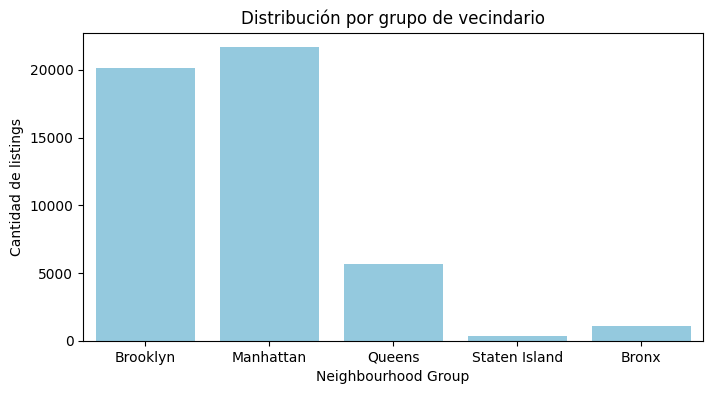

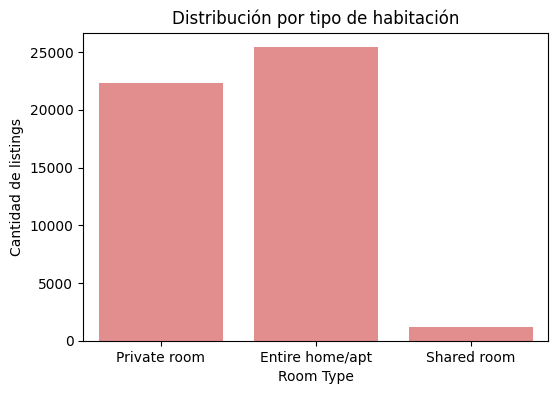

In [20]:
# Frecuencia de valores en columnas categóricas

#por vecindarios principales
print("\nFrecuencia por grupo de vecindario:")
print(df['neighbourhood_group'].value_counts())

#por tipo de habitacion
print("\nFrecuencia por tipo de habitación:")
print(df['room_type'].value_counts())

# por los top 10 
print("\nTop 10 vecindarios con más listings:")
print(df['neighbourhood'].value_counts().head(10))

plt.figure(figsize=(8,4))
sns.countplot(data=df, x="neighbourhood_group", color="skyblue")
plt.title("Distribución por grupo de vecindario")
plt.xlabel("Neighbourhood Group")
plt.ylabel("Cantidad de listings")
plt.show()

plt.figure(figsize=(6,4))
sns.countplot(data=df, x="room_type", color="lightcoral")
plt.title("Distribución por tipo de habitación")
plt.xlabel("Room Type")
plt.ylabel("Cantidad de listings")
plt.show()



